In [1]:
from IPython.display import IFrame
IFrame(src="https://www.youtube.com/embed/BvzWCqReUdg", width=1920/2, height=1080/2)

In [81]:
from math import pi
from qiskit import qiskit
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram, plot_state_qsphere, plot_bloch_multivector
%matplotlib inline

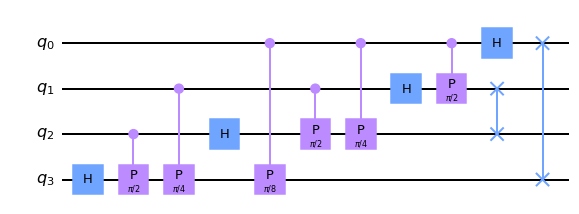

In [82]:
def QFT(n):
    qft_circ = QuantumCircuit(n)
    for i in range(n-1, -1, -1):
        qft_circ.h(i)
        
        for j in range(i - 1, -1, -1): 
            qft_circ.cp(pi/(2 ** (i - j)), j, i)

    for i in range(n // 2):
        qft_circ.swap(i, n - i - 1)
        
    gate = qft_circ.to_gate()
    gate.name = "QFT" + str(n)
    
    return qft_circ

QFT(4).draw(output = 'mpl')

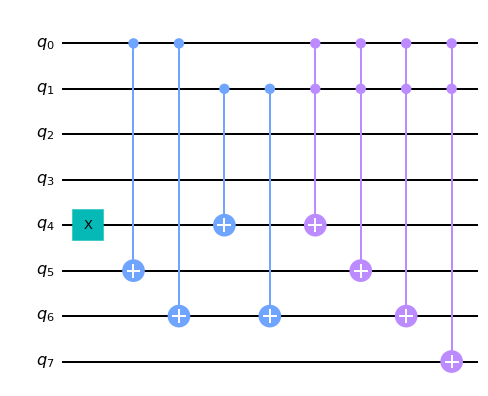

In [83]:
circ = QuantumCircuit(8, name = "7mod15")
circ.x(4)
circ.cx(0,5)
circ.cx(0,6)
circ.cx(1,4)
circ.cx(1,6)

for i in range(4,8):
    circ.ccx(0,1,i)
    
gate_mod = circ.to_gate()
gate_mod.name = "gate_7mod15"

circ.draw(output="mpl")

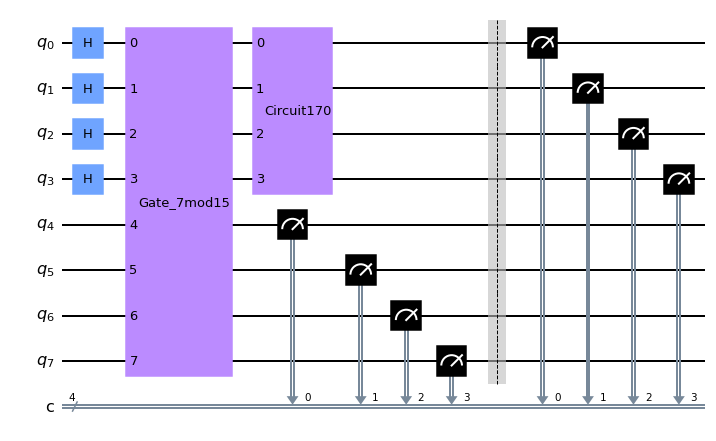

In [84]:
qc = QuantumCircuit(8,4)

qc.h(range(4))
qc.append(gate_mod, range(8))
qc.measure(range(4,8), range(4))
qc.append(QFT(4), range(4))
qc.barrier()
qc.measure(range(4), range(4))

qc.draw(output="mpl")

In [85]:
# simulators
qasm_sim = qiskit.Aer.get_backend("qasm_simulator")
statevec_sim = qiskit.Aer.get_backend("statevector_simulator")

In [88]:
sim_state_vector = qiskit.execute(qc, backend=statevec_sim).result().get_statevector()
sim_counts = qiskit.execute(qc, backend=qasm_sim, shots=1024).result().get_counts()

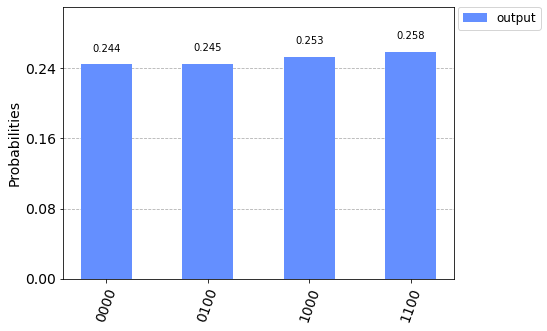

In [89]:
plot_histogram([sim_counts], legend=['output'])